<h1> Assignment 8.1 : Saving Models </h1>
Name: Nicolas, Sean Julian S.<br>
Course and Section: CPE019S3 <br>
Instructor: Engr. Roman Richard <br>
Date Performed: April 15, 2024 <br>
Date Submitted: April 19, 2024 <br>

<hr>







## Importing Libraries and Dataset


In [ ]:
pip install ucimlrepo

In [ ]:
pip install scikeras

In [ ]:
!pip install h5py

In [ ]:
pip install PyYAML

In [ ]:
import numpy as np
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sn
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import LearningRateScheduler
import math

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
land_mines = fetch_ucirepo(id=763)

# data (as pandas dataframes)
X = land_mines.data.features
y = land_mines.data.targets

# metadata
print(land_mines.metadata)

# variable information
print(land_mines.variables)


{'uci_id': 763, 'name': 'Land Mines', 'repository_url': 'https://archive.ics.uci.edu/dataset/763/land+mines-1', 'data_url': 'https://archive.ics.uci.edu/static/public/763/data.csv', 'abstract': 'Detection of mines buried in the ground is very important in terms of safety of life and property. Many different methods have been used in this regard; however, it has not yet been possible to achieve 100% success. Mine detection process consists of sensor design, data analysis and decision algorithm phases. The magnetic anomaly method works according to the principle of measuring the anomalies resulting from the object in the magnetic field that disturbs the structure of it, the magnetic field, and the data obtained at this point are used to determine the conditions such as motion and position. The determination of parameters such as position, depth or direction of motion using magnetic anomaly has been carried out since 1970.', 'area': 'Engineering', 'tasks': ['Classification', 'Clustering']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
dtypes: float64(3)
memory usage: 8.0 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   M       338 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [ ]:
X.head(20)

,V,H,S
0,0.338157,0.000000,0.0
1,0.320241,0.181818,0.0
2,0.287009,0.272727,0.0
3,0.256284,0.454545,0.0
4,0.262840,0.545455,0.0
5,0.240966,0.727273,0.0
6,0.254410,0.818182,0.0
7,0.234924,1.000000,0.0
8,0.353474,0.000000,0.6
9,0.335347,0.181818,0.6


In [ ]:
y.head()

,M
0,1
1,1
2,1
3,1
4,1


In [ ]:
X.shape

(338, 3)

In [ ]:
y.shape

(338, 1)

### Problem being solved with the dataset:
- This data set can be used to determine the type of mine that is encountered in the field using variables such as voltage, height and type of soil.
- Features of dataset

  - Voltage - The output voltage of the sensor
  - Height - The height of the sensor from the ground
  - Soil - type of soil depending on the moisture condition

- Target of dataset

  - Mine type: 5 types of mine that are commonly encountered

## Creating the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
model  = Sequential([
    Flatten(input_shape=(3,)),
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(6, activation="softmax")
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,782 (1.02 MB)

 Trainable params: 267,782 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1=model
history = model.fit(X_train_norm, y_train, epochs=30,batch_size=9,validation_split=0.2)

history.history.keys()

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2362 - loss: 1.6519 - val_accuracy: 0.4706 - val_loss: 1.1915
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4647 - loss: 1.2174 - val_accuracy: 0.5490 - val_loss: 1.0375
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5396 - loss: 1.0759 - val_accuracy: 0.5098 - val_loss: 0.9331
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5234 - loss: 1.0010 - val_accuracy: 0.5686 - val_loss: 0.9432
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5759 - loss: 0.9572 - val_accuracy: 0.6078 - val_loss: 0.9408
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6041 - loss: 0.9786 - val_accuracy: 0.6078 - val_loss: 0.9426
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4989 - loss: 0.9728 - val_accuracy: 0.5490 - val_loss: 0.9435
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6884 - loss: 0.8661 - val_accuracy: 0.5686 - val_los

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
estimator = KerasClassifier(model1, epochs=30, batch_size=7, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("K-Fold Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

K-Fold Accuracy: 56.21% (8.67%)


## Save a model in HDF5 format

In [ ]:
model.save('my_model.h5')

new_model = load_model('my_model.h5')

new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,784 (1.02 MB)

 Trainable params: 267,782 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Save a model and load the model in a JSON format

In [ ]:
model_json = model.to_json()
with open('my_model.json', 'w') as json_file:
    json_file.write(model_json)

print("Model Saved to JSON")

with open('my_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

print("Model Loaded")

Model Saved to JSON
Model Loaded


## Save a model and load the model in a YAML format

In [ ]:
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
print("Model Saved to YAML")

yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
print("Model Loaded")


Model Saved to YAML
Model Loaded


## Checkpoint Neural Network Model Improvements

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
model1  = Sequential([
    Flatten(input_shape=(3,)),
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(6, activation="softmax")
])

model1.summary()
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model1.fit(X_train_norm, y_train, epochs=30,batch_size=9,validation_split=0.2, callbacks=callbacks_list)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,782 (1.02 MB)

 Trainable params: 267,782 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2371 - loss: 1.6393
Epoch 1: val_accuracy improved from -inf to 0.50980, saving model to weights-improvement-01-0.51.hdf5.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2434 - loss: 1.6293 - val_accuracy: 0.5098 - val_loss: 1.1703
Epoch 2/30
13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5253 - loss: 1.1694 
Epoch 2: val_accuracy improved from 0.50980 to 0.56863, saving model to weights-improvement-02-0.57.hdf5.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5120 - loss: 1.1747 - val_accuracy: 0.5686 - val_loss: 0.9882
Epoch 3/30
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5589 - loss: 1.0550
Epoch 3: val_accuracy improved from 0.56863 to 0.58824, saving model to weights-improvement-03-0.59.hdf5.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5548 - loss: 1.0603 - val_accuracy: 0.5882 - val_loss: 0.9601
Epoch 4/30
18/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4411 - 

## Checkpoint Best Neural Network Model only

In [ ]:
filepath="weights.best.hdf5.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model1.fit(X_train, y_train, validation_split=0.20, epochs=10, batch_size=500, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.17647, saving model to weights.best.hdf5.keras

Epoch 2: val_accuracy did not improve from 0.17647

Epoch 3: val_accuracy did not improve from 0.17647

Epoch 4: val_accuracy did not improve from 0.17647

Epoch 5: val_accuracy did not improve from 0.17647

Epoch 6: val_accuracy did not improve from 0.17647

Epoch 7: val_accuracy improved from 0.17647 to 0.25490, saving model to weights.best.hdf5.keras

Epoch 8: val_accuracy improved from 0.25490 to 0.29412, saving model to weights.best.hdf5.keras

Epoch 9: val_accuracy improved from 0.29412 to 0.31373, saving model to weights.best.hdf5.keras

Epoch 10: val_accuracy improved from 0.31373 to 0.37255, saving model to weights.best.hdf5.keras


## Load a saved Neural Network model

In [ ]:
new_model = load_model('my_model.h5')

new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,784 (1.02 MB)

 Trainable params: 267,782 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Visualize Model Training History in Keras

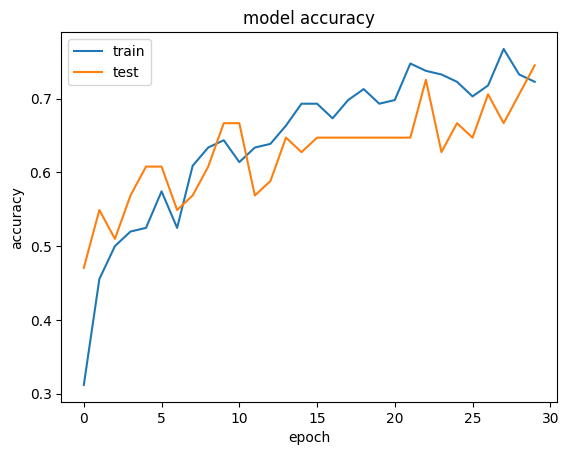

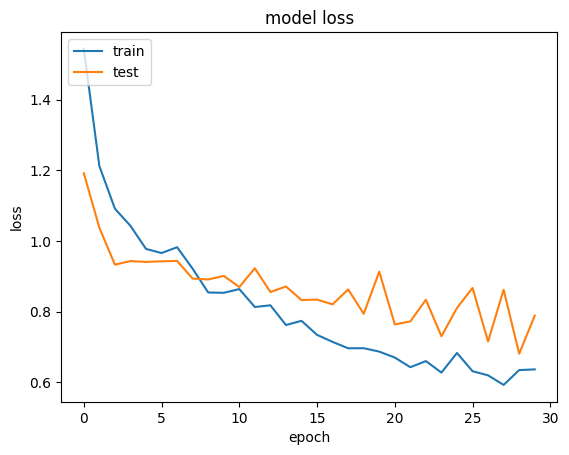

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Show the application of Dropout Regularization

### Show the application of Dropout on the visible layer

In [ ]:
model2  = Sequential([
    Dropout(0.2, input_shape = (3,)),
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(6, activation="softmax")
])

model2.summary()

model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_2 = model2
model2.fit(X_train_norm, y_train, epochs=30,batch_size=9,validation_split=0.2)

estimator = KerasClassifier(model_2, epochs=30, batch_size=7, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_1 (Dropout)                  │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,782 (1.02 MB)

 Trainable params: 267,782 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2916 - loss: 1.6547 - val_accuracy: 0.3922 - val_loss: 1.2027
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3412 - loss: 1.3182 - val_accuracy: 0.5490 - val_loss: 1.0671
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3754 - loss: 1.3034 - val_accuracy: 0.5294 - val_loss: 1.0602
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3307 - loss: 1.4228 - val_accuracy: 0.5686 - val_loss: 1.0435
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4628 - loss: 1.2366 - val_accuracy: 0.4902 - val_loss: 1.1306
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4645 - loss: 1.2593 - val_accuracy: 0.5490 - val_loss: 1.0537
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3999 - loss: 1.3095 - val_accuracy: 0.5686 - val_loss: 1.0345
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4233 - loss: 1.2261 - val_accuracy: 0.6078 - val_loss

Decreased accuracy

### Show the application of Dropout on the hidden layer

In [ ]:
model3  = Sequential([
   Flatten(input_shape=(3,)),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(512, activation="relu"),
    Dense(6, activation="softmax")
])

model3.summary()

model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_3 = model3
model3.fit(X_train_norm, y_train, epochs=30,batch_size=9,validation_split=0.2)

estimator = KerasClassifier(model_2, epochs=30, batch_size=7, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,782 (1.02 MB)

 Trainable params: 267,782 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3118 - loss: 1.6246 - val_accuracy: 0.4902 - val_loss: 1.1831
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4462 - loss: 1.2264 - val_accuracy: 0.5686 - val_loss: 1.0373
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5178 - loss: 1.0702 - val_accuracy: 0.5686 - val_loss: 0.9655
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5185 - loss: 1.1047 - val_accuracy: 0.5686 - val_loss: 0.9088
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5571 - loss: 0.9738 - val_accuracy: 0.6078 - val_loss: 0.9826
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5206 - loss: 0.9432 - val_accuracy: 0.6078 - val_loss: 0.9149
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6097 - loss: 0.9365 - val_accuracy: 0.6078 - val_loss: 0.9552
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6452 - loss: 0.8773 - val_accuracy: 0.6078 - val_los

Decrease in accuracy

## Show the application of a time-based learning rate schedule

In [ ]:

def time_base():
  model  = Sequential([
    Flatten(input_shape=(3,)),
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(6, activation="softmax")
  ])
  epochs = 10
  learning_rate = 0.1
  decay_rate = learning_rate / epochs
  momentum = 0.99
  adam = Adam(learning_rate=learning_rate,ema_momentum = momentum,weight_decay=decay_rate,)
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model

timemodel =time_base()
timemodel.fit(X_train_norm, y_train, epochs=30,batch_size=9,validation_split=0.2)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.2834 - loss: 1.6327 - val_accuracy: 0.5294 - val_loss: 1.1677
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4597 - loss: 1.2027 - val_accuracy: 0.5294 - val_loss: 1.0304
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4358 - loss: 1.1698 - val_accuracy: 0.5490 - val_loss: 1.0370
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5046 - loss: 1.0786 - val_accuracy: 0.6078 - val_loss: 0.9492
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5098 - loss: 1.0892 - val_accuracy: 0.6078 - val_loss: 0.8812
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4824 - loss: 0.9999 - val_accuracy: 0.6275 - val_loss: 0.9652
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5917 - loss: 0.9212 - val_accuracy: 0.6078 - val_loss: 0.9316
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6353 - loss: 0.8594 - val_accuracy: 0.6078 - val_loss

Improved accuracy compared to first model

## Show the application of a drop-based learning rate schedule

In [ ]:
def decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 2
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

def dropbase():
  model  = Sequential([
    Flatten(input_shape=(3,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(6, activation="softmax"),
    ])
  sgd = SGD(learning_rate=0.0, momentum=0.9)
  model.compile(optimizer = sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

modelDTime = dropbase()

learningrate = LearningRateScheduler(decay)
callbacks_list = [learningrate]

modelDTime.fit(X_train_norm, y_train, epochs=30, batch_size=9, validation_split=0.2, callbacks=callbacks_list, verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
23/23 - 4s - 176ms/step - accuracy: 0.3713 - loss: 1.4800 - val_accuracy: 0.4706 - val_loss: 1.1483 - learning_rate: 0.1000
Epoch 2/30
23/23 - 1s - 64ms/step - accuracy: 0.4554 - loss: 1.2784 - val_accuracy: 0.5294 - val_loss: 1.0824 - learning_rate: 0.0500
Epoch 3/30
23/23 - 0s - 12ms/step - accuracy: 0.4802 - loss: 1.1676 - val_accuracy: 0.5294 - val_loss: 0.9931 - learning_rate: 0.0500
Epoch 4/30
23/23 - 0s - 8ms/step - accuracy: 0.4802 - loss: 1.0572 - val_accuracy: 0.6078 - val_loss: 0.9189 - learning_rate: 0.0250
Epoch 5/30
23/23 - 0s - 8ms/step - accuracy: 0.6238 - loss: 0.9562 - val_accuracy: 0.6275 - val_loss: 0.8511 - learning_rate: 0.0250
Epoch 6/30
23/23 - 0s - 14ms/step - accuracy: 0.6238 - loss: 0.9267 - val_accuracy: 0.5490 - val_loss: 0.8780 - learning_rate: 0.0125
Epoch 7/30
23/23 - 0s - 13ms/step - accuracy: 0.6287 - loss: 0.9010 - val_accuracy: 0.6275 - val_loss: 0.8713 - learning_rate: 0.0125
Epoch 8/30
23/23 - 0s - 12ms/step - accuracy: 0.6733 - loss: 0.

Improved accuracy compared to first model

## Conclusion
- In this laboratory activity, I was able to save the model into different formats and then load the models. I also learned that I can save the weights in the model by saving it in h5 format. I also learned that it can be very useful to have checkpoints to pinpoint at what point the model was able to improve. I was also able to improve the accuracy of the model by applying both time based and drop based learning rate schedule